In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Mounted at /content/drive
Num GPUs Available:  1


In [7]:
# set up image data gen
imgdatagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25)

image_dir = "/content/drive/MyDrive/w207/w207-team-project/mtg-jamendo-dataset/download/melspecs_png_mid_base_100_train"
batch_size = 16
img_size=(432, 288)

# train generator
train_generator = imgdatagen.flow_from_directory(
    image_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    subset='training') # set as training data

# validation generator
validation_generator = imgdatagen.flow_from_directory(
    image_dir, # same directory as training data
    target_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical',
    subset='validation') # set as validation data


Found 750 images belonging to 10 classes.
Found 250 images belonging to 10 classes.


# Experiment \#2: CNNs

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 430, 286, 16)      592       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 215, 143, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 491920)            0         
                                                                 
 Output (Dense)              (None, 10)                4919210   
                                                                 
Total params: 4,919,802
Trainable params: 4,919,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
47/47 [==============================] - 9s 194ms/step - loss: 74.8667 - accuracy: 0.1227 - val_loss

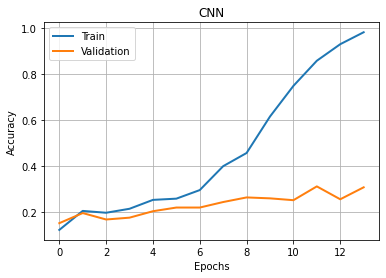

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# clear session + set random seed
tf.keras.backend.clear_session()
# tf.random.set_seed(10)

# build model
model = tf.keras.Sequential()
model.add(
    tf.keras.Input(shape=(432, 288, 3)))
# model.add(
#     tf.keras.layers.Reshape(target_shape=(432,288,1)))
model.add(
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(
    tf.keras.layers.MaxPooling2D((2,2)))
# model.add(
#     tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# model.add(
#     tf.keras.layers.MaxPooling2D((2,2)))
model.add(
    tf.keras.layers.Flatten())
model.add(
    tf.keras.layers.Dense(units=10, activation='softmax', name='Output'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])
model.summary()

# fit model
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(
          train_generator,
          # steps_per_epoch=2000,
          epochs=100,
          validation_data=validation_generator,
          # validation_steps=800
          callbacks=[es]
          )
# history = model.fit(x=X_train, y=y_train, validation_split=0.25, epochs=20)

# graph train and validation accuracies over epochs
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], linewidth=2.0, label='Train')
ax.plot(history.history['val_accuracy'], linewidth=2.0, label='Validation')
ax.set_title("CNN")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid()
fig.show()

# get test accuracy
# y_pred = np.argmax(model.predict(x=X_test), axis=1)
# train_accuracy = history.history['accuracy'][-1]
# validation_accuracy = history.history['val_accuracy'][-1]
# test_accuracy = accuracy_score(y_test, y_pred)
# print(F"Train accuracy: {train_accuracy}")
# print(F"Validation accuracy: {validation_accuracy}")
# print(F"Test accuracy: {test_accuracy}")